Roka Hosono, Veda Pedagati, Jahnavi Tumeti
Project 2

In [1]:
!pip install ts2vg
!pip install igraph

DO NOT RUN BELOW CODE. IT CREATES A CSV FILE CALLED Accelometer_Visibility_Graph_Data_Subjects.csv AND THE NEXT CELL USES THAT. THIS CODE TAKES FOREVER TO MAKE THE CSV
THE CSV IS ALREADY MADE AND GIVEN SO PLEASE GO TO THE NEXT CELL

If you are willing to wait, it takes about 44 seconds for it to load each subject as long as it is plugged in.

In [57]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
from ts2vg import NaturalVG, HorizontalVG
import igraph as ig
import networkx as nx

def create_VG(data,attribute,VGtype):
    if VGtype=="NVG":
        attribute="attr_"+attribute
        g=NaturalVG()
        g.build(data[attribute][1000:2024])
        edges=g.edges
        ng=nx.Graph(edges)
        deg=ng.degree()
        g2=ig.Graph(edges=edges)
        return ["NVG",nx.diameter(ng),ig.mean(g2.degree()),nx.average_shortest_path_length(ng)]
    elif VGtype=="HVG":
        attribute="attr_"+attribute
        g=HorizontalVG()
        g.build(data[attribute][1000:2024])
        edges=g.edges
        ng=nx.Graph(edges)
        g2=ig.Graph(edges=edges)
        return ["HVG",nx.diameter(ng),ig.mean(g2.degree()),nx.average_shortest_path_length(ng)]

def create_chart(body_part):
    path=""
    numsubjects=15
    Activity=["Walking","Running","Climbing Up", "Climbing Down"]
    
    axis=["x","y","z"]

    data = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Pength':[],
            'Activity':[],
            'Body Part':[]}
  
    # Create DataFrame
    chart = pd.DataFrame(data)



    for i in range(1,numsubjects+1):
        for j in Activity: 
            path="Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_part+".csv"
            print(path)
            try:   
                file=pd.read_csv(path)  
            except:
                print("No such file exists")
                continue
            for l in axis:
                NVGData=create_VG(file,l,VGtype="NVG")
                HVGData=create_VG(file,l,VGtype="HVG")
                data2= {'Method': "NVG",
                    'Subject': i,
                    'Accelorometer Axis':l,
                    'Average Degree':NVGData[2],                        
                    'Network Diameter':NVGData[1],
                    'Average Path Pength':NVGData[3],
                    'Activity':j,
                    'Body Part':body_part}
                
                data3= {'Method': "HVG",
                    'Subject': i,
                    'Accelorometer Axis':l,
                    'Average Degree':HVGData[2],
                    'Network Diameter':HVGData[1],
                    'Average Path Pength':HVGData[3],
                    'Activity':j,
                    'Body Part':body_part}
                chart=chart.append(data2,ignore_index=True)
                chart=chart.append(data3,ignore_index=True)
    display(chart)
    return chart

body=["chest","forearm","head","shin","thigh","upperarm","waist"]
data = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Pength':[],
            'Activity':[],
            'Body Part':[]}
  
    
cumulativechart=pd.DataFrame(data)
for i in body:
    if i=='forearm': break
    chart=create_chart(body_part=i)
    cumulativechart=pd.concat([cumulativechart,chart],ignore_index=True)
   
    

cumulativechart.to_csv("Accelometer_Visibility_Graph_Data_Subjects-chest.csv")

            




Subject 1/Walking/acc_walking_chest.csv
Subject 1/Running/acc_running_chest.csv
Subject 1/Climbing Up/acc_climbingup_chest.csv
Subject 1/Climbing Down/acc_climbingdown_chest.csv
Subject 2/Walking/acc_walking_chest.csv
Subject 2/Running/acc_running_chest.csv
Subject 2/Climbing Up/acc_climbingup_chest.csv
Subject 2/Climbing Down/acc_climbingdown_chest.csv
Subject 3/Walking/acc_walking_chest.csv
Subject 3/Running/acc_running_chest.csv
Subject 3/Climbing Up/acc_climbingup_chest.csv
Subject 3/Climbing Down/acc_climbingdown_chest.csv
Subject 4/Walking/acc_walking_chest.csv
Subject 4/Running/acc_running_chest.csv
Subject 4/Climbing Up/acc_climbingup_chest.csv
Subject 4/Climbing Down/acc_climbingdown_chest.csv
Subject 5/Walking/acc_walking_chest.csv
Subject 5/Running/acc_running_chest.csv
Subject 5/Climbing Up/acc_climbingup_chest.csv
Subject 5/Climbing Down/acc_climbingdown_chest.csv
Subject 6/Walking/acc_walking_chest.csv
Subject 6/Running/acc_running_chest.csv
Subject 6/Climbing Up/acc_clim

,Method,Subject,Accelorometer Axis,Average Degree,Network Diameter,Average Path Pength,Activity,Body Part
0,NVG,1.0,x,11.451172,10.0,4.441492,Walking,chest
1,HVG,1.0,x,3.958984,26.0,11.578024,Walking,chest
2,NVG,1.0,y,11.986328,9.0,4.241050,Walking,chest
3,HVG,1.0,y,3.951172,22.0,10.666252,Walking,chest
4,NVG,1.0,z,8.570312,10.0,4.897722,Walking,chest
...,...,...,...,...,...,...,...,...
355,HVG,15.0,x,3.951172,33.0,13.926625,Climbing Down,chest
356,NVG,15.0,y,14.156250,15.0,5.840334,Climbing Down,chest
357,HVG,15.0,y,3.941406,31.0,13.582100,Climbing Down,chest
358,NVG,15.0,z,8.953125,10.0,4.692061,Climbing Down,chest


USES Accelometer_Visibility_Graph_Data_Subjects.csv THAT WAS MADE FROM THE ABOVE CELL

,Unnamed: 0,Method,Subject,Accelorometer Axis,Average Degree,Network Diameter,Average Path Pength,Activity,Body Part
0,0,NVG,1.0,x,11.451172,10.0,4.441492,Walking,chest
1,1,HVG,1.0,x,3.958984,26.0,11.578024,Walking,chest
2,2,NVG,1.0,y,11.986328,9.0,4.241050,Walking,chest
3,3,HVG,1.0,y,3.951172,22.0,10.666252,Walking,chest
4,4,NVG,1.0,z,8.570312,10.0,4.897722,Walking,chest
...,...,...,...,...,...,...,...,...,...
2509,2509,HVG,15.0,x,3.917969,40.0,16.785202,Climbing Down,waist
2510,2510,NVG,15.0,y,9.677734,14.0,5.287115,Climbing Down,waist
2511,2511,HVG,15.0,y,3.933594,31.0,12.079689,Climbing Down,waist
2512,2512,NVG,15.0,z,8.652344,10.0,4.865105,Climbing Down,waist


Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

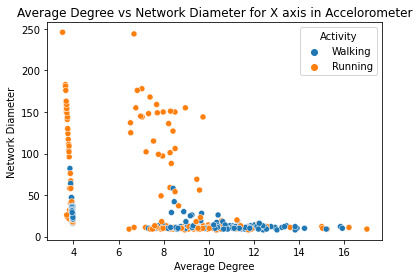

In [47]:
import pandas as pd
import seaborn as sns
visibility=pd.read_csv("Accelometer_Visibility_Graph_Data_Subjects.csv")
display(visibility)
x_axis=visibility.loc[visibility['Accelorometer Axis']=='x']
x_axis1=x_axis.loc[(x_axis['Activity']=='Climbing Up')| (x_axis['Activity']=='Climbing Down')]
x_axis2=x_axis.loc[(x_axis['Activity']=='Walking')| (x_axis['Activity']=='Running')]
y_axis=visibility.loc[visibility['Accelorometer Axis']=='y']
y_axis1=y_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
y_axis2=y_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
z_axis=visibility.loc[visibility['Accelorometer Axis']=='z']
z_axis1=z_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
z_axis2=z_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
NVG=visibility.loc[visibility['Method']=='NVG']
NVG1=NVG.loc[(NVG['Activity']=='Climbing Up')| (NVG['Activity']=='Climbing Down')]
NVG2=NVG.loc[(NVG['Activity']=='Walking')| (NVG['Activity']=='Running')]
HVG=visibility.loc[visibility['Method']=='HVG']
HVG1=HVG.loc[(HVG['Activity']=='Climbing Up')| (HVG['Activity']=='Climbing Down')]
HVG2=HVG.loc[(HVG['Activity']=='Walking')| (HVG['Activity']=='Running')]


ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis2)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

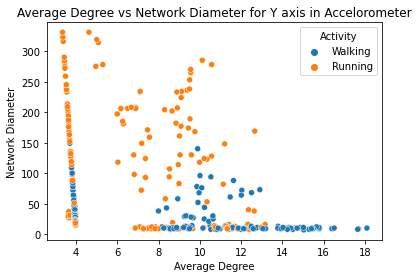

In [48]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis2)
ax2.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

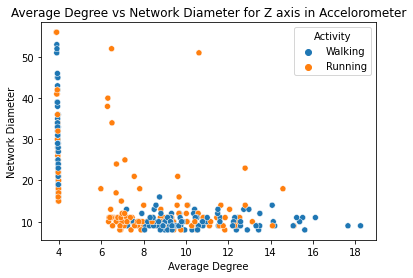

In [49]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis2)
ax2.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility Graph')

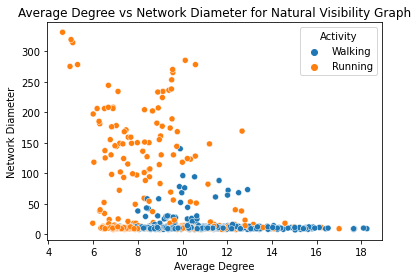

In [50]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG2)
ax3.set_title("Average Degree vs Network Diameter for Natural Visibility Graph")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Horizontal Visibility Graph')

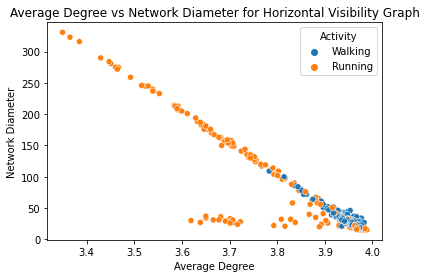

In [51]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG2)
ax3.set_title("Average Degree vs Network Diameter for Horizontal Visibility Graph")

Scatterplots for Climbing Up/Down

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

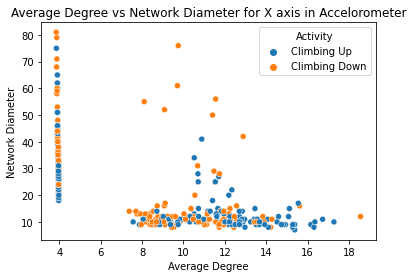

In [52]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis1)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

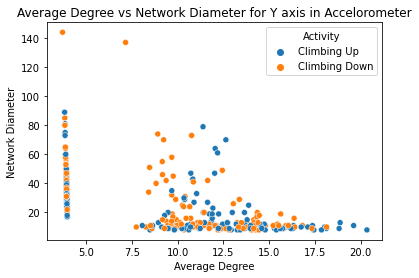

In [53]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis1)
ax.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

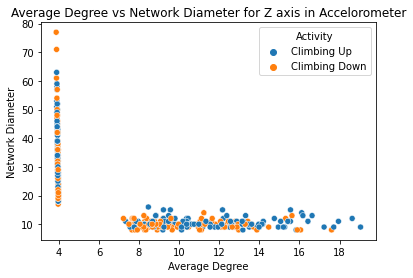

In [54]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis1)
ax.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility in Accelorometer')

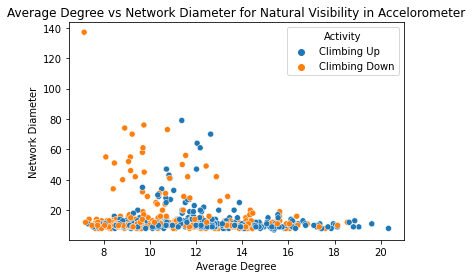

In [55]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG1)
ax.set_title("Average Degree vs Network Diameter for Natural Visibility in Accelorometer")

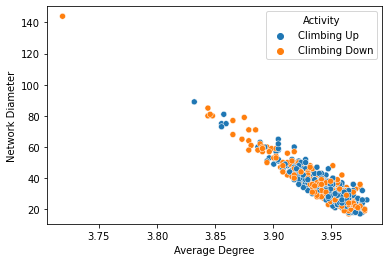

In [56]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG1)